In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Data Science\\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1103,58,male,36.08,0,no,southeast,11363.28320
661,57,female,23.98,1,no,southeast,22192.43711
1156,19,male,44.88,0,yes,southeast,39722.74620
1091,55,female,29.83,0,no,northeast,11286.53870
9,60,female,25.84,0,no,northwest,28923.13692


In [5]:
print("Number of Rows =",df.shape[0])
print("Number of Coumns =",df.shape[1])

Number of Rows = 1338
Number of Coumns = 7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum()

1

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


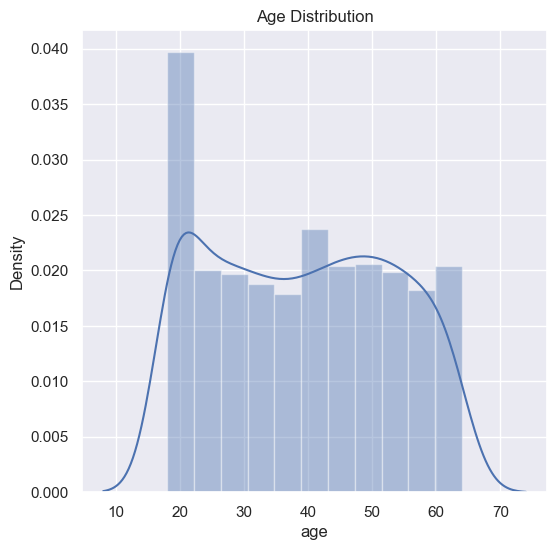

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

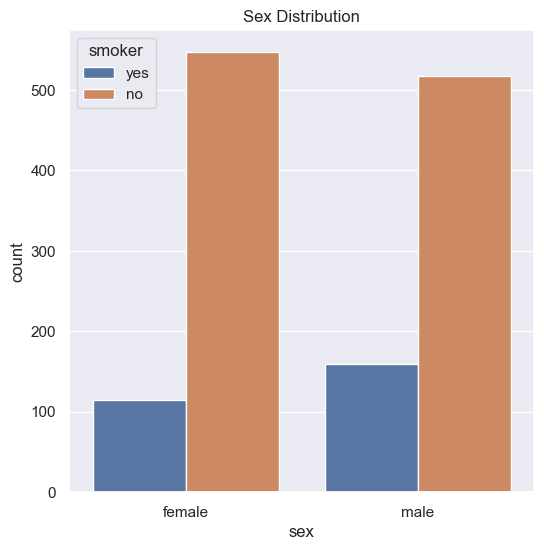

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df,hue="smoker")
plt.title("Sex Distribution")
plt.show()

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


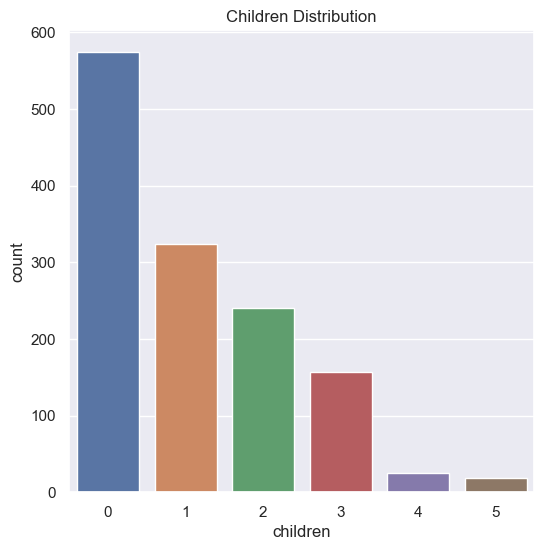

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("Children Distribution")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


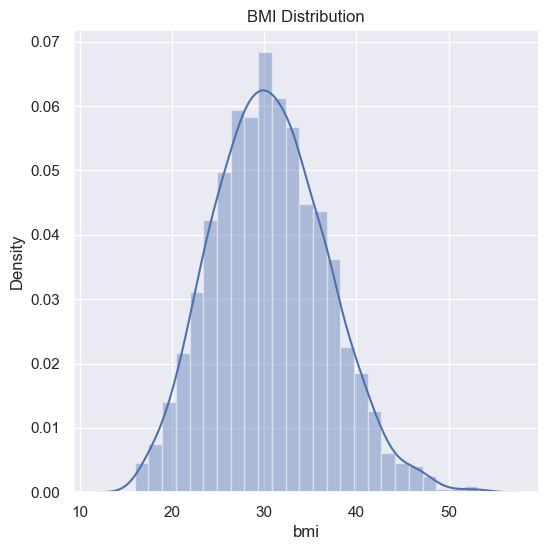

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

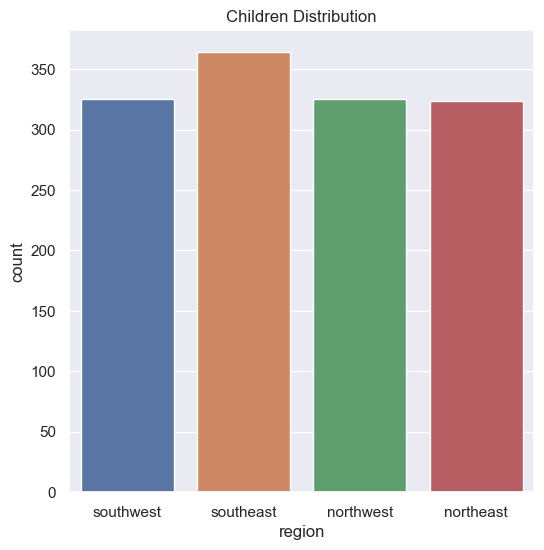

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.title("Children Distribution")
plt.show()

In [15]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [18]:
df.replace({"sex":{"female":0,"male":1}},inplace=True)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [20]:
df.replace({"region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,1,16884.92400
1,18,1,33.770,1,no,0,1725.55230
2,28,1,33.000,3,no,0,4449.46200
3,33,1,22.705,0,no,2,21984.47061
4,32,1,28.880,0,no,2,3866.85520


In [22]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
df.replace({"smoker":{"yes":0,"no":1}},inplace=True)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [25]:
x=df.drop(columns=["charges"],axis=1)
y=df["charges"]

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2
1334,18,0,31.920,0,1,3
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [30]:
x_train

array([[-1.33631918, -1.01886959, -1.41805377, -0.93004238,  0.50729114,
         1.37084547],
       [-0.18052529,  0.98147988,  0.03017623,  1.56197434,  0.50729114,
         0.48669559],
       [ 1.33645421, -1.01886959,  0.39886179, -0.93004238,  0.50729114,
        -0.39745429],
       ...,
       [ 1.55316556,  0.98147988,  2.10558593, -0.93004238,  0.50729114,
        -0.39745429],
       [ 0.83079438, -1.01886959, -0.81075823, -0.09937014,  0.50729114,
        -0.39745429],
       [ 1.33645421, -1.01886959,  0.28204232, -0.09937014,  0.50729114,
         1.37084547]])

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, random_state=42)

has


In [38]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [39]:
model.predict(x_test)

array([ 3332.9944694 , 14190.7282934 , 11992.474645  ,  3606.6083404 ,
        8986.1250558 ,  9324.2338188 ,  3758.1833748 ,  2466.7250645 ,
       20237.2950229 ,  7542.0609303 , 12069.1987095 ,  9660.7065015 ,
       21142.1658238 ,  1569.1528155 , 11014.6714839 , 15405.5869478 ,
        4077.9315175 ,  7599.9264813 , 20304.4666814 ,  2950.85260021,
       12198.955926  ,  5910.8011816 , 39974.217951  , 26699.2580338 ,
       38370.9364892 , 11219.3697418 ,  4331.6656414 ,  9815.8565958 ,
        5000.9078823 ,  4781.8170943 ,  6932.1748301 ,  5498.1888863 ,
        7232.7023198 ,  5711.7938566 ,  9801.5465137 ,  8560.2594455 ,
       39090.9576463 ,  5792.3948853 , 18405.0845255 , 14432.9205366 ,
        2716.0432489 , 35671.7910391 , 10244.6209157 ,  8862.1433592 ,
        7582.9734177 ,  7130.7921207 , 11310.9838288 ,  7024.055498  ,
        5041.2126133 , 10993.3913789 , 13645.4618343 ,  1731.1213445 ,
       18278.5553996 , 43789.085675  ,  6805.72069   , 12747.4897836 ,
      

In [40]:
model.score(x_train,y_train)*100

97.72950403342898

In [41]:
model.score(x_test,y_test)*100

83.18721797281079